Visualization of different data types with python
==========
Here, will learn some of the most basic `plotting` functionalities with `Python`, to give you the tools you need to assess basic distributions and relationships within you dataset. We will focus on the [Seaborn library](https://seaborn.pydata.org/index.html), which is designed to make nice looking `plots` quickly and (mostly) intuitively.

In [7]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Let's first gather our dataset. We'll use participant related information from the [OpenNeuro dataset ds000228 "MRI data of 3-12 year old children and adults during viewing of a short animated film"](https://openneuro.org/datasets/ds000228/versions/1.0.0) .

In [5]:
%%bash
wget -O data/participants.tsv https://openneuro.org/crn/datasets/ds000228/snapshots/1.0.0/files/participants.tsv

bash: line 1: wget: command not found


CalledProcessError: Command 'b'wget -O participants.tsv https://openneuro.org/crn/datasets/ds000228/snapshots/1.0.0/files/participants.tsv\n'' returned non-zero exit status 127.

In [12]:
pheno_file = ('data/participants.tsv')

pheno = pandas.read_csv(pheno_file,sep='\t')

pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness,ToM Booklet-Matched,ToM Booklet-Matched-NOFB,FB_Composite,FB_Group,WPPSI BD raw,WPPSI BD scaled,KBIT_raw,KBIT_standard,DCCS Summary,Scanlog: Scanner,Scanlog: Coil,Scanlog: Voxel slize,Scanlog: Slice Gap
0,sub-pixar001,4.774812,4yo,child,M,R,0.80,0.736842,6.0,pass,22.0,13.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
1,sub-pixar002,4.856947,4yo,child,F,R,0.72,0.736842,4.0,inc,18.0,9.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.1
2,sub-pixar003,4.153320,4yo,child,F,R,0.44,0.421053,3.0,inc,15.0,9.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
3,sub-pixar004,4.473648,4yo,child,F,R,0.64,0.736842,2.0,fail,17.0,10.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.2
4,sub-pixar005,4.837782,4yo,child,F,R,0.60,0.578947,4.0,inc,13.0,5.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.2


What are our different variables?

In [13]:
pheno.columns

Index(['participant_id', 'Age', 'AgeGroup', 'Child_Adult', 'Gender',
       'Handedness', 'ToM Booklet-Matched', 'ToM Booklet-Matched-NOFB',
       'FB_Composite', 'FB_Group', 'WPPSI BD raw', 'WPPSI BD scaled',
       'KBIT_raw', 'KBIT_standard', 'DCCS Summary', 'Scanlog: Scanner',
       'Scanlog: Coil', 'Scanlog: Voxel slize', 'Scanlog: Slice Gap'],
      dtype='object')

### Univariate visualization

Let's start by having a quick look at the `summary statistics` and `distribution` of `Age`:

In [14]:
print(pheno['Age'].describe())

count    155.000000
mean      10.555189
std        8.071957
min        3.518138
25%        5.300000
50%        7.680000
75%       10.975000
max       39.000000
Name: Age, dtype: float64


/Users/peerherholz/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/peerherholz/anaconda3/lib/python3.6/site-pack

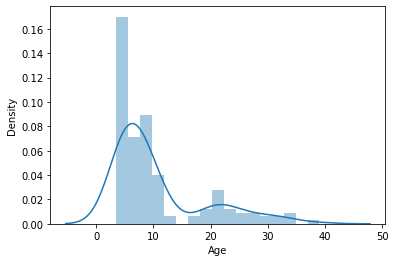

In [15]:
# simple histogram with seaborn
sns.distplot(pheno['Age'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

What kind of distribution do we have here? 

Let's try log normalization as a solution. Here's one way to do that:

/Users/peerherholz/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


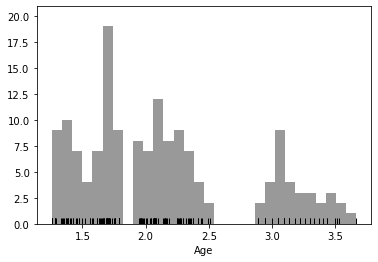

In [16]:
import numpy as np

log_age = np.log(pheno['Age'])
sns.distplot(log_age,
            bins=30,          
            color='black',    
            kde=False,         
            rug=True,          
            )

There is another approach for log-transforming that is perhaps better practice, and generalizable to *nearly any* type of transformation. With [sklearn](https://scikit-learn.org/stable/index.html), you can great a custom transformation object, which can be applied to different datasets.

_Advantages_ :
* Can be easily reversed at any time
* Perfect for basing transformation off one dataset and applying it to a different dataset

_Distadvantages_ :
* Expects 2D data (but that's okay)
* More lines of code :(

In [17]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)

age2d = pheno['Age'].values.reshape(-1,1)
log_transformer.fit(age2d)

sk_log_Age = log_transformer.transform(age2d)

Are two log transformed datasets are equal?

In [18]:
all(sk_log_Age[:,0] == log_age)

True

And we can easily reverse this normalization to return to the original values for age.

In [19]:
reverted_age = log_transformer.inverse_transform(age2d)

The inverse transform should be the same as our original values:

In [20]:
all(reverted_age == age2d)

True

Another strategy would be `categorization`. Two type of `categorization` have already been done for us in this dataset. We can visualize this with `pandas value_counts()` or with `seaborn countplot()`:

In [21]:
# Value counts of AgeGroup
pheno['AgeGroup'].value_counts()

5yo       34
8-12yo    34
Adult     33
7yo       23
3yo       17
4yo       14
Name: AgeGroup, dtype: int64

/Users/peerherholz/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


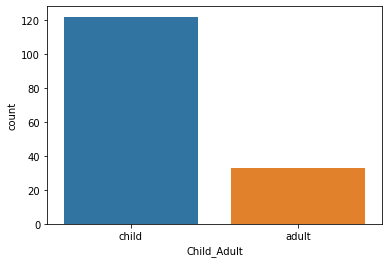

In [22]:
# Countplot of Child_Adult

sns.countplot(pheno['Child_Adult'])

### Bivariate visualization: Linear x Linear

Cool! Now let's play around a bit with `bivariate visualization`. 

For example, we could look at the association between `age` and a cognitive phenotype like `Theory of Mind` or `"intelligence"`. We can start with a `scatterplot`. A quick and easy `scatterplot` can be built with `regplot()`:

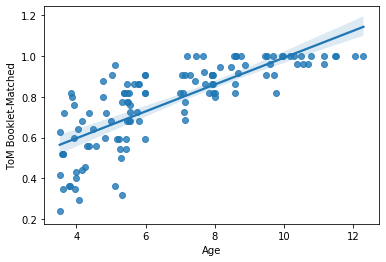

In [23]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])

`regplot()` will automatically drop missing values (`pairwise`). There are also a number of handy and very quick arguments to change the nature of the plot:

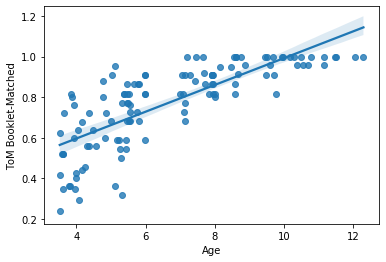

In [24]:
## Try uncommenting these lines (one at a time) to see how
## the plot changes.

sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
           #order=2,        # fit a quadratic curve
           #lowess=True,    # fit a lowess curve
           #fit_reg = False # no regression line
           #marker = ''     # no points
           #marker = 'x',   # xs instead of points
           )

Take a minute to try plotting another set of variables. Don't forget -- you may have to change the data type!

In [25]:
#sns.regplot(x=, y=)


This would be as good a time as any to remind you that `seaborn` is built on top of `matplotlib`. Any `seaborn` object could be built from scratch from a `matplotlib` object. For example, `regplot()` is built on top of `plt.scatter`:

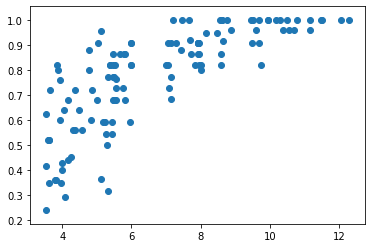

In [26]:
plt.scatter(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])


If you want to get really funky/fancy, you can play around with `jointplot()` and change the `"kind"` argument.

However, note that `jointplot` is a different `type` of `object` and therefore follows different rules when it comes to editing. More on this later ...

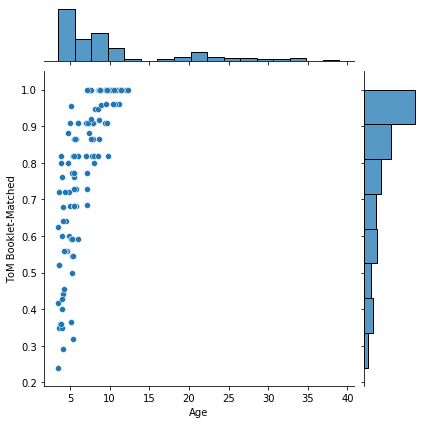

/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/peerherholz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dime

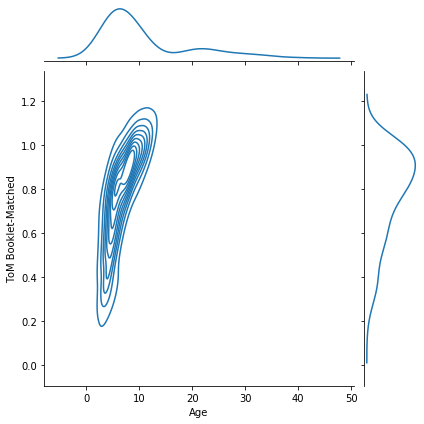

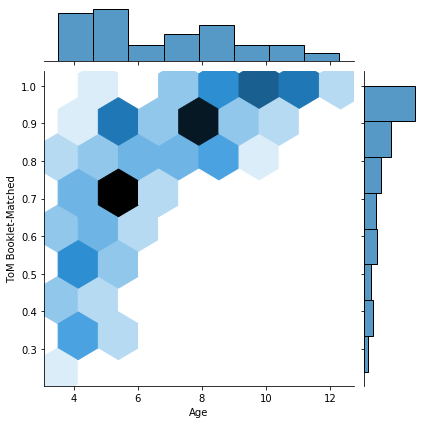

In [27]:
for kind in ['scatter','kde','hex']:
    sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind=kind)

    plt.show()

That last one was a bit weird, eh? These `hexplots` are really built for larger sample sizes. Just to showcase this, let's plot a `hexplot` 1000 samples of some `random data`. Observe how the `hexplot` deals with `density` in a way that the `scatterplot` cannot.

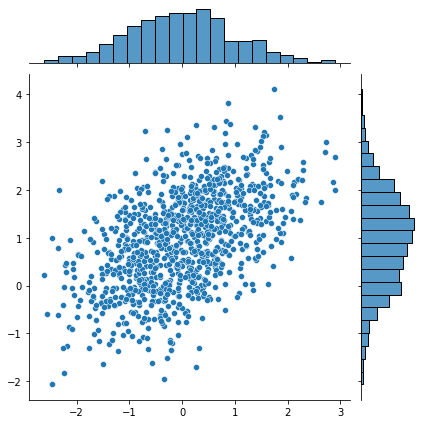

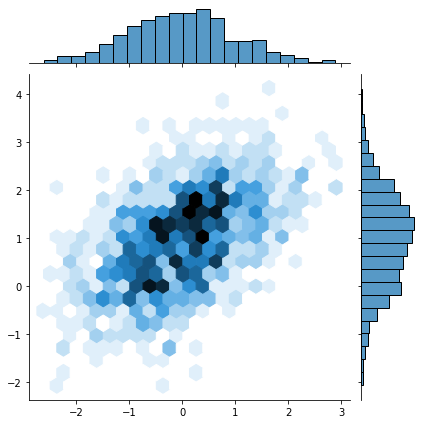

In [28]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="scatter")
sns.jointplot(x=x, y=y, kind="hex")



More on dealing with "overplotting" here: https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/.

However, note that `jointplot` is a different type of object and therefore follows different rules when it comes to editing. This is perhaps one of the biggest drawbacks of `seaborn`.

For example, look at how the same change requires different syntax between `regplot` and `jointplot`:

Text(0.5, 0, 'Participant Age')

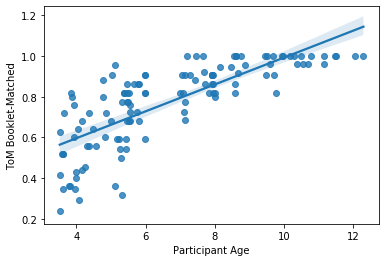

In [29]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])
plt.xlabel('Participant Age')

Text(0.5, 32.99999999999995, 'Participant Age')

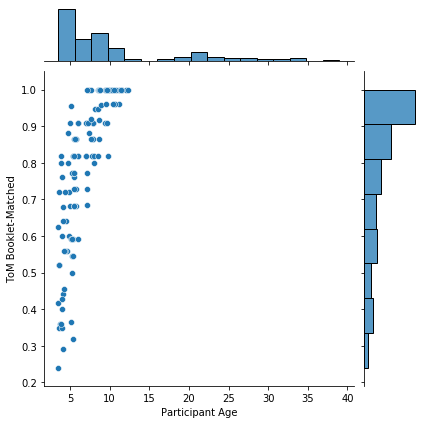

In [30]:
g = sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind='scatter')
g.ax_joint.set_xlabel('Participant Age')

Finally, `lmplot()` is another nice `scatterplot` option for observing `multivariate interactions`.

However, `lmplot()` cannot simply take two `arrays` as input. Rather (much like `R`), you must pass `lmplot` some data (in the form of a `pandas DataFrame` for example) and `variable` names. Luckily for us, we already have our data in a `pandas DataFrame`, so this should be easy.

Let's look at how the relationship between `Age` and `Theory of Mind` varies by `Gender`. We can do this using the `"hue"`, `"col"` or `"row"` arguments: 

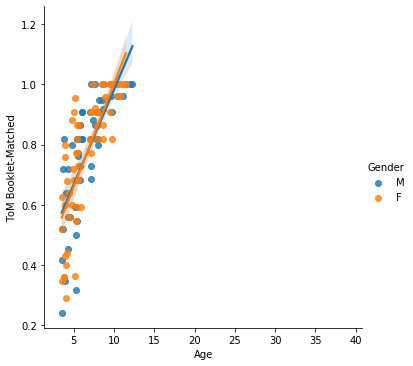

In [31]:
sns.lmplot(x='Age', y = 'ToM Booklet-Matched', 
           data = pheno, hue='Gender')

Unfortunately, these plots can be a bit sub-optimal at times. The `regplot` is perhaps more flexible. You can read more about this type of plotting here: https://seaborn.pydata.org/tutorial/distributions.html.

### Bivariate visualization: Linear x Categorical

Let's take a quick look at how to look at `bivariate relationships` when one `variable` is `categorical` and the other is `scalar`.

For consistency can continue to look at the same relationship, but look at `"AgeGroup"` instead of `age`.

There are many ways to visualize such relationships. While there are some advantages and disadvantes of each type of plot, much of the choice will come down to personal preference.

In [32]:
sns.

SyntaxError: invalid syntax (<ipython-input-32-40c5c93bca4b>, line 1)

Here are several ways of visualizing the same relationship. Note that adults to not have cognitive tests, so we won't
include adults in any of these plots. Note also that we explicitly pass the order of x:


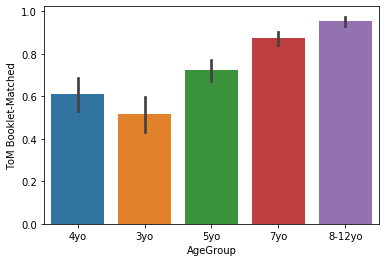

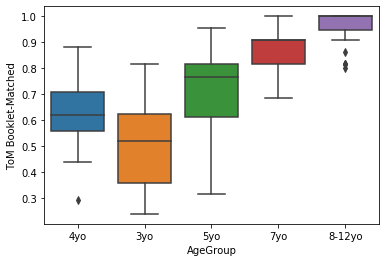

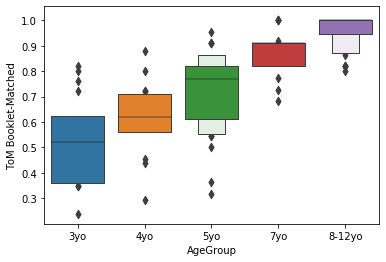

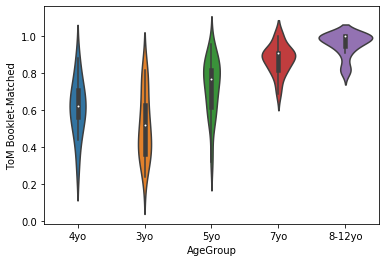

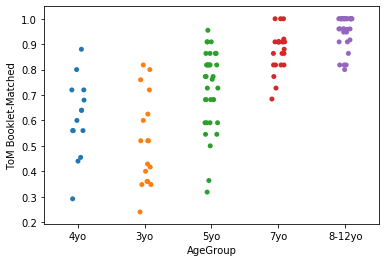

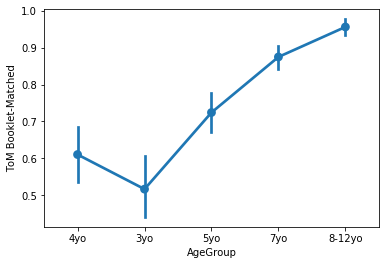

In [35]:
order = sorted(pheno.AgeGroup.unique())[:-1]

sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'])
plt.show()

sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'])
plt.show()

sns.boxenplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order)
plt.show()

sns.violinplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'])
plt.show()

sns.stripplot(x='AgeGroup', jitter=True,
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'])
plt.show()

sns.pointplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'])
plt.show()

Generally, `lineplots` and `barplots` are frowned upon because they do not show the actual data, and therefore can mask troublesome distributions and outliers. 

But perhaps you're really into `barplots`? No problem! One nice thing about many `seaborn plots` is that they can be overlaid very easily. Just call two plots at once before doing `plt.show()` (or in this case, before running the cell). Just overlay a `stripplot` on top!

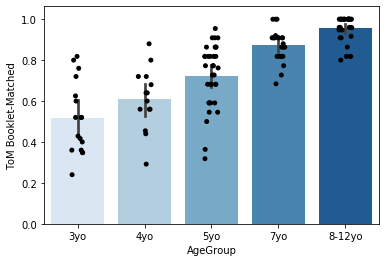

In [36]:
sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order, palette='Blues')

sns.stripplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            jitter=True,
            order = order, color = 'black')

You can find more info on these types of plots here: https://seaborn.pydata.org/tutorial/categorical.html.

Having trouble deciding which type of plot you want to use? Checkout the raincloud plot, which combines multiple types of plots to achieve a highly empirical visualization. 

Read more about it here:
https://wellcomeopenresearch.org/articles/4-63/v1?src=rss.



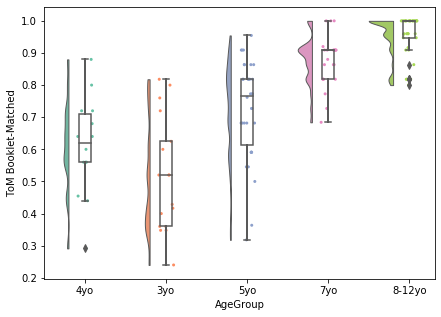

In [46]:
import ptitprince as pt

dx = "AgeGroup"; dy = "ToM Booklet-Matched"; ort = "v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = pheno[pheno.AgeGroup!='Adult'], palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

### Bivariate visualization: Categorical x Categorical

What if we want to observe the relationship between two `categorical variables`? Since we are usually just looking at `counts` or `percentages`, a simple `barplot` is fine in this case.

Let's look at `AgeGroup` x `Gender`. `Pandas.crosstab` helps sort the data in an intuitive way. 

In [47]:
pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

Gender,F,M
AgeGroup,,
3yo,10,7
4yo,8,6
5yo,16,18
7yo,11,12
8-12yo,19,15
Adult,20,13


We can actually plot this directly from `pandas`.

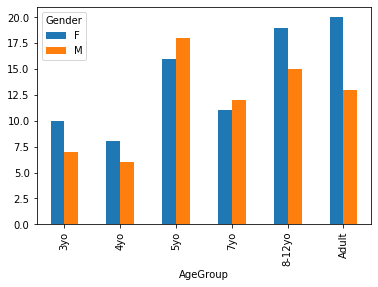

In [48]:
pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],).plot.bar()

The above plot gives us absolute `counts`. Perhaps we'd rather visualize differences in `proportion` across `age groups`. Unfortunately we must do this manually.

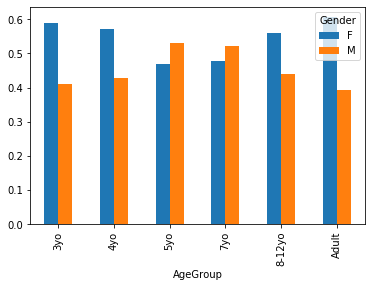

In [49]:
crosstab = pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

crosstab.apply(lambda r: r/r.sum(), axis=1).plot.bar()


### Style points

You will be surprised to find out exactly how customizable your `python plots` are. Its not so important when you're first `exploring` your data, but `aesthetic value` can add a lot to `visualizations` you are communicating in the form of `manuscripts`, `posters` and `talks`.

Once you know the relationships you want to `plot`, spend time adjusting the `colors`, `layout`, and fine details of your `plot` to `maximize interpretability`, `transparency`, and if you can spare it, `beauty`!

You can easily edit `colors` using many `matplotlib` and `python arguments`, often listed as `col`, `color`, or `palette`. 

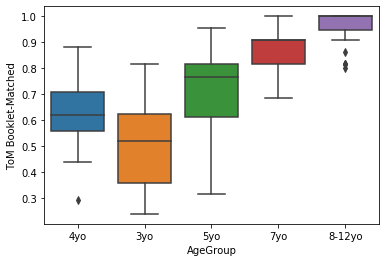

In [50]:
## try uncommenting one of these lines at a time to see how the 
## graph changes

sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            #palette = 'Greens_d'
            #palette = 'spectral',
            #color = 'black'
           )

You can find more about your palette choices here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

More about your color choices here:
https://matplotlib.org/3.1.0/gallery/color/named_colors.html.

You can also easily change the style of the plots by setting `"style"` or `"context"`:

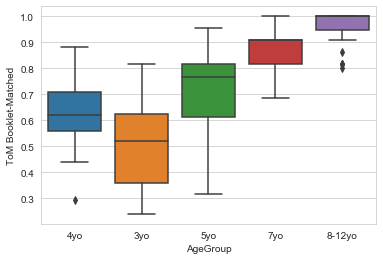

In [51]:
sns.set_style('whitegrid')
sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
           )

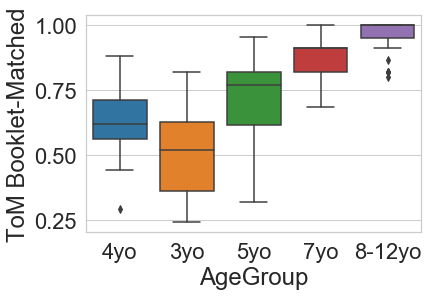

In [52]:
sns.set_context('notebook',font_scale=2)
sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
           )

Notice these changes do not reset after the `plot` is shown. To learn more about controlling `figure aesthetics`, as well as how to produce temporary style changes, visit here: https://seaborn.pydata.org/tutorial/aesthetics.html.

Finally, remember that these `plots` are `extremely customizable`. Literally every aspect can be changed. Once you know the relationship you want to `plot`, don't be afraid to spend a good chunk of time `tweaking` your `plot` to perfection:

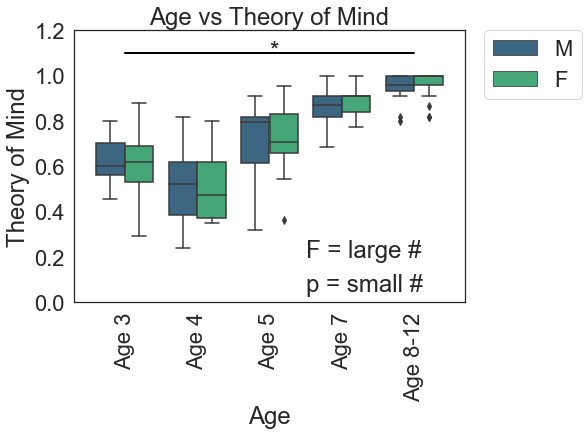

In [53]:
# set style
sns.set_style('white')
sns.set_context('notebook',font_scale=2)

# set figure size
plt.subplots(figsize=(7,5))

g = sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            hue = 'Gender',
            data = pheno[pheno.AgeGroup!='Adult'],
           palette = 'viridis')

# Change X axis
new_xtics = ['Age 3','Age 4','Age 5', 'Age 7', 'Age 8-12']
g.set_xticklabels(new_xtics, rotation=90)
g.set_xlabel('Age')

# Change Y axis
g.set_ylabel('Theory of Mind')
g.set_yticks([0,.2,.4,.6,.8,1,1.2])
g.set_ylim(0,1.2)

# Title
g.set_title('Age vs Theory of Mind')

# Add some text
g.text(2.5,0.2,'F = large #')
g.text(2.5,0.05,'p = small #')

# Add significance bars and asterisks
plt.plot([0,0, 4, 4], 
         [1.1, 1.1, 1.1, 1.1], 
         linewidth=2, color='k')
plt.text(2,1.08,'*')

# Move figure legend outside of plot

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

That's all for now. There's so much more to visualization, but this should at least get you started.

#### Recommended reading:

multidimensional plotting with seaborn: https://jovianlin.io/data-visualization-seaborn-part-3/

Great resource for complicated plots, creative ideas, and data!: https://python-graph-gallery.com/

A few don'ts of plotting: https://www.data-to-viz.com/caveats.html